Ahmed Ibrahim 

Problem Week 04

In [187]:
#package import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import t
from scipy.optimize import minimize

Problem 1

Calculate and compare the expected value and standard deviation of price at time t $(P_t)$, given each of the 3 types of price returns, assuming $r_t$ is normally distributed with mean $0$ and standard deviation $\sigma$. Simulate each return equation using this equation and show the mean and standard deviation match your expectations



1. Classical Brownian Motion

Expected Value of P_t: 100.00510924547586
Standard Deviation of P_t: 0.3000607121422593


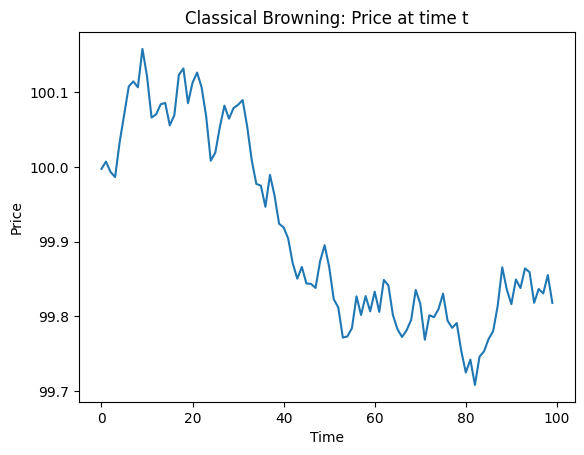

In [93]:
# Define parameters
n = 1000 # Number of simulations
t_period = 100 # time period
sigma = 0.03  # Standard deviation
r_mu = 0  # Mean of r_t

#initial price
P_0 = 100

# Simulate price returns
total_p_t = []
for i in range(n):
    r = np.random.normal(r_mu, sigma,  t_period)
    # print(r)
    # print(r.shape)
    P_t = P_0 + np.cumsum(r)
    # print(P_t)
    # print(P_t[-1])
    total_p_t.append(P_t[-1])
    # print(P_t[-1])

# print(total_p_t)
# expected value of P_t
mean_P_t = np.mean(total_p_t)

# standard deviation of P_t

std_P_t = np.std(total_p_t)

print(f"Expected Value of P_t: {mean_P_t}")

print(f"Standard Deviation of P_t: {std_P_t}")

#plot the distribution of P_t


plt.plot(P_t)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Classical Browning: Price at time t")

plt.show()




In [52]:
#theoretical mean and standard deviation in classical brownian motion,
# E[P_t] = P_0 and SD[P_t] = sigma * sqrt(t)
theo_sd = sigma * np.sqrt(t_period)
theo_mean = P_0

print(f"Theoretical Mean of P_t: {theo_mean}")

print(f"Theoretical Standard Deviation of P_t: {theo_sd}")


Theoretical Mean of P_t: 100
Theoretical Standard Deviation of P_t: 0.3


2. Arithmetic Return System

Expected Value of P_t: 100.28114699617191
Standard Deviation of P_t: 32.00549162589664


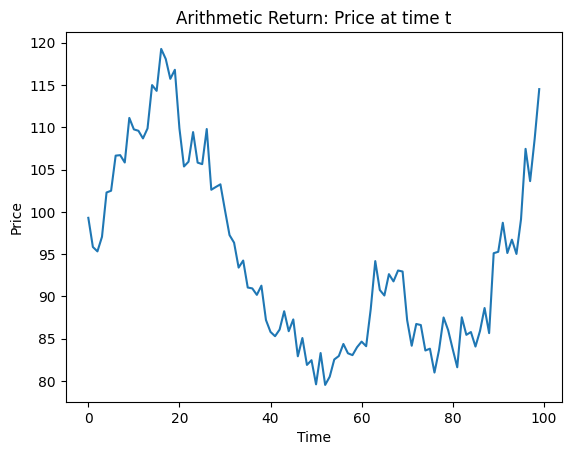

In [94]:
# Define parameters
n = 1000 # Number of simulations
t_period = 100 # time period
sigma = 0.03  # Standard deviation
r_mu = 0  # Mean of r_t

#initial price
p_0 = 100

# Simulate price returns

total_p_t = []

for i in range(n):
    r = np.random.normal(r_mu, sigma,  t_period)
    P_t = p_0 * np.cumprod(1+r)
    total_p_t.append(P_t[-1])

# mean of P_t
mean_p_t = np.mean(total_p_t)

# standard deviation of P_t

std_P_t = np.std(total_p_t)

print(f"Expected Value of P_t: {mean_p_t}")

print(f"Standard Deviation of P_t: {std_P_t}")

#plot the distribution of P_t

plt.plot(P_t)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Arithmetic Return: Price at time t")

plt.show()

   



The arithmetic return system assumes that there is a constant mean return $\mu$. Here, we assume that the mean return is $0$. Therefore, the mean of $(P_t)$, and all additional $(P_{t+1})$, $(P_{t++})$ will be equal to the initial price $P_0$, which is $100$. Therefore, the theorectical mean of the price is $100$.

In [81]:
theo_sd = p_0* sigma * np.sqrt(t_period)

print(f"Theoretical Standard Deviation of P_t: {theo_sd}")

Theoretical Standard Deviation of P_t: 30.0


3. Geometric Return System

Expected Value of P_t: 100.28114699617191
Standard Deviation of P_t: 31.902029036602144


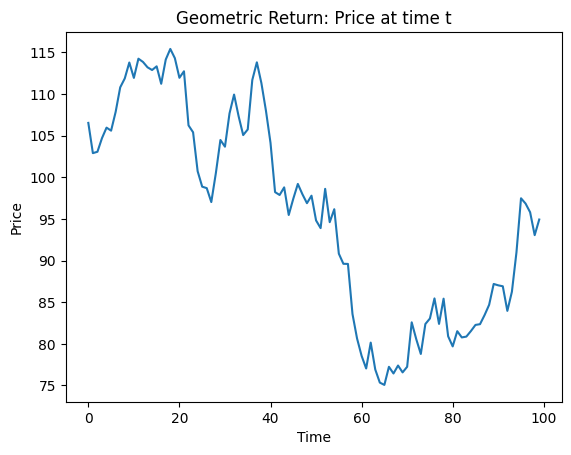

In [95]:
# Define parameters
n = 1000 # Number of simulations
t_period = 100 # time period
sigma = 0.03  # Standard deviation
r_mu = 0  # Mean of r_t

#initial price
p_0 = 100

total_p_t = []

for i in range(n):
    r = np.random.normal(r_mu, sigma,  t_period)
    # print('abc:', r)
    # print(('cde:',np.cumsum(r)))
    P_t = p_0 * np.exp(np.cumsum(r))
    
    total_p_t.append(P_t[-1])
# standard deviation of P_t

std_P_t = np.std(total_p_t)

print(f"Expected Value of P_t: {mean_p_t}")

print(f"Standard Deviation of P_t: {std_P_t}")

#plot the distribution of P_t

plt.plot(P_t)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Geometric Return: Price at time t")

plt.show()

    


In [92]:
mu = (sigma**2)/2

theo_mean_3 = p_0 * np.exp(mu*t_period)
print(f"Theoretical Mean of P_t: {theo_mean_3}")

theo_sd_3 = p_0 * np.exp(2*mu*t_period) * np.sqrt(np.exp(sigma**2*t_period)-1)
print(f"Theoretical Standard Deviation of P_t: {theo_sd_3}")

Theoretical Mean of P_t: 104.6027859908717
Theoretical Standard Deviation of P_t: 33.57783310629757


Problem 2

Implement a function similar to the “return_calculate()” in this week’s code. Allow the user to specify the method of return calculation.
Use DailyPrices.csv. 

Calculate the arithmetic returns for all prices.

Remove the mean from the series so that the mean(META)=0

Calculate VaR

1. Using a normal distribution.
2. Using a normal distribution with an Exponentially Weighted variance (λ = 0. 94)
3. Using a MLE fitted T distribution.
4. Using a fitted AR(1) model.
5. Using a Historic Simulation.

Compare the 5 values.


In [97]:
def return_calculate(prices, method="DISCRETE", date_column="date"):
    # Extract variable names
    vars = list(prices.columns)
    n_vars = len(vars)
    vars = [var for var in vars if var != date_column]

    # Check if date_column is in DataFrame
    if n_vars == len(vars):
        raise ValueError(f"date_column: {date_column} not in DataFrame: {vars}")

    n_vars = n_vars - 1

    p = prices[vars].values
    n, m = p.shape
    p2 = np.empty((n - 1, m))

    for i in range(n - 1):
        for j in range(m):
            p2[i, j] = p[i + 1, j] / p[i, j]

    if method.upper() == "DISCRETE":
        p2 = p2 - 1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in ('LOG', 'DISCRETE')")

    dates = prices[date_column].iloc[1:].reset_index(drop=True)
    out = pd.DataFrame({date_column: dates})

    for i in range(n_vars):
        out[vars[i]] = p2[:, i]

    return out


In [99]:
df_prices = pd.read_csv("https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/Week04/DailyPrices.csv")

df_prices.head()

,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-01,388.679565,157.028442,257.908386,127.820000,139.243423,109.739998,277.160004,110.550003,282.429993,...,282.124664,136.138718,36.036259,123.325203,70.653595,424.766022,158.011505,46.662727,40.990002,249.972107
1,2022-09-02,384.581177,154.891113,253.609909,127.510002,136.346054,107.849998,270.209991,108.680000,277.670013,...,281.791626,134.696564,37.229321,122.039116,69.294113,422.966797,155.602798,46.748875,40.490002,243.384186
2,2022-09-06,383.130066,153.618668,250.826813,126.110001,134.527710,106.809998,274.420013,107.480003,276.589996,...,280.483856,135.834595,36.703716,122.108894,69.422180,419.574921,155.464035,46.155418,40.380001,246.615067
3,2022-09-07,390.013000,155.040237,255.620483,129.479996,137.056152,109.449997,283.700012,110.480003,281.040009,...,285.154480,138.591293,36.408989,126.814598,70.722557,424.726715,158.992813,46.547867,41.470001,251.776749
4,2022-09-08,392.562256,153.549088,256.046387,129.820007,139.814484,108.379997,289.260010,109.419998,283.339996,...,285.852631,140.523956,37.499485,128.828476,72.072182,431.766174,157.099579,47.763493,42.709999,253.882172


In [248]:
#calculating the arithmetic return for all prices
# df_prices_concat = pd.concat(df_prices, axis=1)

df_prices_copy = df_prices.copy()
arithmetic = return_calculate(df_prices_copy, method="DISCRETE", date_column="Date")

arithmetic

/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_2770/3964860248.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]
/var/folders/72/nxfcp8kj65bbt3qtv2krff1w0000gn/T/ipykernel_2770/3964860248.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-02,-0.010544,-0.013611,-0.016667,-0.002425,-0.020808,-0.017223,-0.025076,-0.016915,-0.016854,...,-0.001180,-0.010593,0.033107,-0.010428,-0.019242,-0.004236,-0.015244,0.001846,-0.012198,-0.026355
1,2022-09-06,-0.003773,-0.008215,-0.010974,-0.010980,-0.013336,-0.009643,0.015581,-0.011042,-0.003890,...,-0.004641,0.008449,-0.014118,0.000572,0.001848,-0.008019,-0.000892,-0.012695,-0.002717,0.013275
2,2022-09-07,0.017965,0.009254,0.019111,0.026723,0.018795,0.024717,0.033817,0.027912,0.016089,...,0.016652,0.020295,-0.008030,0.038537,0.018731,0.012279,0.022698,0.008503,0.026994,0.020930
3,2022-09-08,0.006536,-0.009618,0.001666,0.002626,0.020126,-0.009776,0.019598,-0.009595,0.008184,...,0.002448,0.013945,0.029951,0.015880,0.019083,0.016574,-0.011908,0.026116,0.029901,0.008362
4,2022-09-09,0.015535,0.018840,0.022977,0.026575,0.028377,0.020945,0.036023,0.021568,0.008576,...,0.007327,0.017244,0.038774,-0.004179,0.018863,0.026460,0.036721,0.015431,0.005385,-0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2023-09-18,0.000586,0.016913,-0.003513,-0.002920,0.001503,0.005895,-0.033201,0.004772,0.006986,...,0.007485,0.006938,0.010399,0.013118,-0.006183,0.020125,-0.003329,-0.001639,0.001890,-0.003386
261,2023-09-19,-0.002074,0.006181,-0.001246,-0.016788,-0.010144,-0.001230,0.004599,-0.000936,0.000135,...,-0.002453,-0.013644,-0.012743,0.013589,-0.002247,-0.016519,0.012970,0.000938,0.000566,-0.012087
262,2023-09-20,-0.009193,-0.019992,-0.023977,-0.017002,-0.029435,-0.031150,-0.014672,-0.030541,-0.009879,...,0.009450,-0.006986,-0.010591,0.001544,-0.018361,-0.010062,-0.002748,-0.008903,0.020177,0.000282
263,2023-09-21,-0.016528,-0.008889,-0.003866,-0.044053,-0.028931,-0.024675,-0.026239,-0.023999,-0.009651,...,0.012216,-0.018635,-0.016223,-0.002032,-0.011646,-0.013686,-0.026725,-0.013948,-0.002403,-0.045601


In [141]:
#calculate the mean of META

arithmetic['META']


0     -0.030479
1     -0.011103
2      0.011669
3      0.010412
4      0.043749
         ...   
260    0.007459
261    0.008329
262   -0.017701
263   -0.013148
264    0.011328
Name: META, Length: 265, dtype: float64

arithmetic mean of META after removing mean from series: -1.047380211910525e-19


<Axes: >

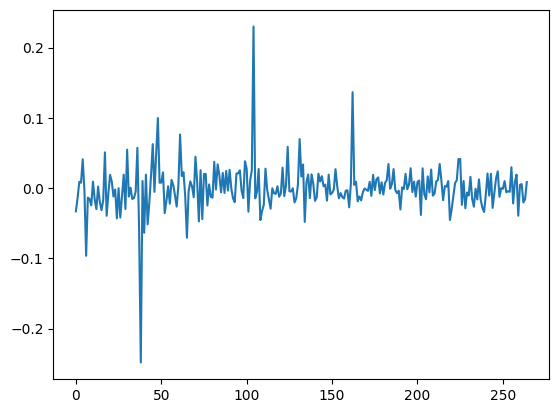

In [148]:
arithmetic['META'] = (arithmetic['META'] - np.mean(arithmetic['META']))

print(f"arithmetic mean of META after removing mean from series: {np.mean(arithmetic['META'])}")

arithmetic['META'].plot()

VAR Calculations

In [160]:
z_score = stats.norm.ppf(0.95)
z_score

1.644853626951472

In [159]:
#1. VAR using Normal distribution
alpha = 0.05
meta_mu = np.mean(arithmetic['META'])
meta_sigma = np.std(arithmetic['META'])

z_score = stats.norm.ppf(1-alpha)  # For 95% confidence level

#Calculate VaR
VaR = -(meta_mu + z_score * meta_sigma)

print(f"VaR using normal distribution at 95% confidence level: {VaR:.5f}")


VaR at 95% confidence level: -0.05418


In [181]:
# 2. VAR using normal distribution with EWM variance
confidence = 0.95
lambda_value = 0.94
meta_squared = arithmetic['META']**2

variance = arithmetic['META'].ewm(alpha = 0.06).var().iloc[-1]
meta_sigma_2 = np.sqrt(variance)
z_score = stats.norm.ppf(confidence)
variance_ewm = -(meta_mu + z_score * meta_sigma_2)

print(f"VaR using normal distribution with EWM variance : {variance_ewm:.5f}")


VaR using normal distribution with EWM variance : -0.03014


In [186]:
# 3. VAR using MLE Fitted T distribution
params = t.fit(arithmetic['META'])

confidence = 0.95

degree_of_freedom = params[0]
alpha = 1 - confidence
t_alpha_nu = t.ppf(1 - alpha/2, degree_of_freedom)

VaR = -(meta_mu + t_alpha_nu * meta_sigma)
print(f"VaR using MLE Fitted T distribution: {VaR:.5f}")
# print(alpha)



VaR using MLE Fitted T distribution: -0.10762


In [199]:
#4. VAR using fitted AR(1) model
# Fit AR(1) model
confidence = 0.95
ar_model = AutoReg(arithmetic['META'], lags=1).fit()

ar_params = ar_model.params

# Get residuals

ar_residuals = ar_model.resid

ar_variance = np.var(ar_residuals)

# Get fitted mean and std

ar_mean = np.mean(ar_residuals)

ar_sigma = np.sqrt(ar_variance)

ar_rho, ar_intercept = ar_params[1], ar_params[0]


ar_alpha = ar_intercept / (1 - ar_rho)

ar_z_score = stats.norm.ppf(confidence)

# Calculate VaR

ar_var = -(ar_alpha + ar_z_score * ar_sigma)

print(f"VaR using fitted AR(1) model: {ar_var:.5f}")


VaR using fitted AR(1) model: -0.05426


In [206]:
# 5. VAR using a historic simulation

variance_historic = np.percentile(arithmetic['META'], 5)

print(f"VaR using a historic simulation: {variance_historic:.5f}")


VaR using a historic simulation: -0.03948


In [207]:
# All VAR scores
print(f"VaR using normal distribution at 95% confidence level: {VaR:.5f}")
print(f"VaR using normal distribution with EWM variance : {variance_ewm:.5f}")
print(f"VaR using MLE Fitted T distribution: {VaR:.5f}")
print(f"VaR using fitted AR(1) model: {ar_var:.5f}")
print(f"VaR using a historic simulation: {variance_historic:.5f}")

VaR using normal distribution at 95% confidence level: -0.10762
VaR using normal distribution with EWM variance : -0.03014
VaR using MLE Fitted T distribution: -0.10762
VaR using fitted AR(1) model: -0.05426
VaR using a historic simulation: -0.03948


Problem 3

Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0.

This file contains the stock holdings of 3 portfolios. You own each of these portfolios. Using an exponentially weighted covariance with lambda = 0.94, calculate the VaR of each portfolio as well as your total VaR (VaR of the total holdings). Express VaR as a $.

Discuss your methods and your results.

Choose a different model for returns and calculate VaR again. Why did you choose that model? How did the model change affect the results?



In [432]:
portfolio_df = pd.read_csv("https://raw.githubusercontent.com/ibrahimjuhas/FinTech545_Fall2023_Ibrahim/main/Week04/Project/portfolio.csv")

portfolio_df.sample(5)

,Portfolio,Stock,Holding
79,C,MDLZ,131
12,A,JPM,153
95,C,LRCX,194
88,C,CB,190
98,C,BSX,188


In [433]:
portfolio_A = portfolio_df[portfolio_df['Portfolio'] == 'A']['Stock']
print(portfolio_A.shape)

# portfolio_A

portfolio_B = portfolio_df[portfolio_df['Portfolio'] == 'B']['Stock']

# portfolio_B

portfolio_C = portfolio_df[portfolio_df['Portfolio'] == 'C']['Stock']

# portfolio_C

(33,)


In [434]:
holding_A = portfolio_df[portfolio_df['Portfolio'] == 'A']['Holding']

print(holding_A)

# holding_A

holding_B = portfolio_df[portfolio_df['Portfolio'] == 'B']['Holding']

# holding_B

holding_C = portfolio_df[portfolio_df['Portfolio'] == 'C']['Holding']

# holding_C

0     158
1     178
2     110
3      54
4      69
5      60
6     167
7     185
8      84
9      61
10     68
11    199
12    153
13     78
14     56
15     73
16    165
17    141
18    172
19    139
20     58
21     68
22    183
23    170
24    154
25     79
26     79
27    171
28    127
29     63
30     58
31     70
32     94
Name: Holding, dtype: int64


In [435]:
portfolio_A

0      AAPL
1      MSFT
2      AMZN
3      NVDA
4     GOOGL
5      TSLA
6      GOOG
7     BRK-B
8      META
9       UNH
10      XOM
11      LLY
12      JPM
13      JNJ
14        V
15       PG
16       MA
17     AVGO
18       HD
19      CVX
20      MRK
21     ABBV
22     COST
23      PEP
24     ADBE
25      WMT
26       KO
27     CSCO
28      CRM
29      MCD
30      ACN
31      BAC
32      TMO
Name: Stock, dtype: object

In [437]:
portfolio_A_prices = df_prices_copy[portfolio_A].values

# portfolio_A_prices = df_prices_copy['AAPL'].values
# print(portfolio_A_prices[:,0])



portfolio_B_prices = df_prices_copy[portfolio_B].values

portfolio_C_prices = df_prices_copy[portfolio_C].values

# print(portfolio_A_prices)
# portfolio_B_prices = prices[portfolio_B].values
# portfolio_C_prices = prices[portfolio_C].values


[[157.028442 257.908386 127.82     ... 284.188782  32.528236 549.068054]
 [154.891113 253.609909 127.510002 ... 279.543976  32.489361 541.890015]
 [153.618668 250.826813 126.110001 ... 278.943695  32.129772 543.485229]
 ...
 [175.490005 320.769989 135.289993 ... 316.799988  28.549999 504.890015]
 [173.929993 319.529999 129.330002 ... 312.        28.049999 501.589996]
 [174.789993 317.01001  129.119995 ... 316.089996  27.639999 502.790009]]


In [438]:
portfolio_A_returns = np.log(portfolio_A_prices)
print(portfolio_A_returns)

[[5.05642695 5.55260443 4.85062302 ... 5.64963874 3.48210851 6.30822239]
 [5.04272237 5.5357973  4.84819481 ... 5.63315962 3.48091268 6.29506306]
 [5.03447335 5.52476271 4.83715455 ... 5.63100995 3.46978308 6.29800253]
 ...
 [5.16758209 5.77072432 4.90742057 ... 5.75827062 3.3516569  6.22434061]
 [5.15865288 5.76685116 4.86236729 ... 5.74300319 3.3339886  6.21778304]
 [5.16358521 5.75893335 4.86074217 ... 5.75602697 3.31926396 6.22017261]]


In [439]:
#DAILY RETURNS
portfolio_A_returns = np.diff(np.log(portfolio_A_prices),axis=0)
print(portfolio_A_returns)

portfolio_B_returns = np.diff(np.log(portfolio_B_prices),axis=0)

portfolio_C_returns = np.diff(np.log(portfolio_C_prices),axis=0)

[[-0.01370457 -0.01680713 -0.00242822 ... -0.01647912 -0.00119583
  -0.01315934]
 [-0.00824902 -0.01103458 -0.01104026 ... -0.00214967 -0.0111296
   0.00293947]
 [ 0.00921133  0.01893114  0.02637185 ...  0.01157455  0.01530854
   0.01197945]
 ...
 [-0.02019474 -0.02426902 -0.01714839 ... -0.00167158 -0.00349654
  -0.00759645]
 [-0.00892921 -0.00387316 -0.04505328 ... -0.01526743 -0.0176683
  -0.00655757]
 [ 0.00493233 -0.00791781 -0.00162513 ...  0.01302378 -0.01472463
   0.00238956]]


In [440]:
def ewma_covariance(X, alpha):
    n, m = X.shape
    weights = np.exp(-alpha * np.arange(n))
    weighted_X = X * weights[:, np.newaxis]
    covariance = np.dot(weighted_X.T, weighted_X) / weights.sum()
    return covariance

In [443]:
print(portfolio_A_returns)
print(portfolio_B_returns.shape)
print(portfolio_C_returns.shape)

[[-0.01370457 -0.01680713 -0.00242822 ... -0.01647912 -0.00119583
  -0.01315934]
 [-0.00824902 -0.01103458 -0.01104026 ... -0.00214967 -0.0111296
   0.00293947]
 [ 0.00921133  0.01893114  0.02637185 ...  0.01157455  0.01530854
   0.01197945]
 ...
 [-0.02019474 -0.02426902 -0.01714839 ... -0.00167158 -0.00349654
  -0.00759645]
 [-0.00892921 -0.00387316 -0.04505328 ... -0.01526743 -0.0176683
  -0.00655757]
 [ 0.00493233 -0.00791781 -0.00162513 ...  0.01302378 -0.01472463
   0.00238956]]
(265, 33)
(265, 34)


In [444]:
portfolio_A_prices

array([[157.028442, 257.908386, 127.82    , ..., 284.188782,  32.528236,
        549.068054],
       [154.891113, 253.609909, 127.510002, ..., 279.543976,  32.489361,
        541.890015],
       [153.618668, 250.826813, 126.110001, ..., 278.943695,  32.129772,
        543.485229],
       ...,
       [175.490005, 320.769989, 135.289993, ..., 316.799988,  28.549999,
        504.890015],
       [173.929993, 319.529999, 129.330002, ..., 312.      ,  28.049999,
        501.589996],
       [174.789993, 317.01001 , 129.119995, ..., 316.089996,  27.639999,
        502.790009]])

In [445]:
portfolio_A_prices[-1,:]

array([174.789993, 317.01001 , 129.119995, 416.100006, 130.25    ,
       244.880005, 131.25    , 360.160004, 299.079987, 506.100006,
       114.940002, 550.539978, 145.729996, 160.5     , 235.080002,
       151.580002, 402.220001, 829.080017, 305.730011, 166.279999,
       106.339996, 152.740005, 558.590027, 175.270004, 512.900024,
       162.350006,  57.599998,  53.57    , 206.429993, 272.220001,
       316.089996,  27.639999, 502.790009])

In [456]:
#calculate the covariance matrices for each portfolio
alpha = 0.94
cov_A = ewma_covariance(portfolio_A_returns, alpha)
cov_B = ewma_covariance(portfolio_B_returns, alpha)
cov_C = ewma_covariance(portfolio_C_returns, alpha)

total_returns = np.concatenate((portfolio_A_returns, portfolio_B_returns, portfolio_C_returns), axis=1)
# print(total_returns)
total_returns_cov = ewma_covariance(total_returns, alpha)
# print(total_returns_cov)

portfolio_A_value = portfolio_A_prices[-1,:] * holding_A
# print(portfolio_A_value)

portfolio_B_value = portfolio_B_prices[-1,:] * holding_B
# print(portfolio_B_value)

portfolio_C_value = portfolio_C_prices[-1,:] * holding_C
# print(portfolio_C_value)

# calculate total portfolio value for each portfolio at the end of the period, taking last days value
total_portfolio_value = portfolio_A_value.sum() + portfolio_B_value.sum() + portfolio_C_value.sum()
# print(total_portfolio_value)

3051268.07261


In [458]:
#calculate VAR for each portfolio and total portfolio VAR

confidence = 0.95
z_score = stats.norm.ppf(confidence)

#calculate the VAR for each portfolio

portfolio_A_var = z_score * np.sqrt(np.dot(portfolio_A_value, np.dot(cov_A, portfolio_A_value)))
portfolio_B_var = z_score * np.sqrt(np.dot(portfolio_B_value, np.dot(cov_B, portfolio_B_value)))
portfolio_C_var = z_score * np.sqrt(np.dot(portfolio_C_value, np.dot(cov_C, portfolio_C_value)))

#calculate the total portfolio VAR

total_portfolio_var = z_score * np.sqrt(np.dot(np.concatenate((portfolio_A_value, portfolio_B_value, portfolio_C_value)), np.dot(total_returns_cov, np.concatenate((portfolio_A_value, portfolio_B_value, portfolio_C_value)))))



print(f"Portfolio A VAR: ${portfolio_A_var:.5f}")

print(f"Portfolio B VAR: ${portfolio_B_var:.5f}")

print(f"Portfolio C VAR: ${portfolio_C_var:.5f}")

print(f"Total Portfolio VAR: ${total_portfolio_var:.5f}")



Portfolio A VAR: $15189.50331
Portfolio B VAR: $7423.58090
Portfolio C VAR: $25128.04557
Total Portfolio VAR: $47576.11536


Using AR(1) Model

In [474]:
# calculating covariance matrix using AR(1) model
lambda_2 = 0.94  # Autoregression coefficient
sigma2_portfolioA = np.var(portfolio_A_returns, axis=0, ddof=1)
sigma2_portfolioB = np.var(portfolio_B_returns, axis=0, ddof=1)
sigma2_portfolioC = np.var(portfolio_C_returns, axis=0, ddof=1)
cov_A_2 = lambda_2 * sigma2_portfolioA[:, None] * sigma2_A[None, :]
cov_B_2 = lambda_2 * sigma2_portfolioB[:, None] * sigma2_B[None, :]
cov_C_2 = lambda_2 * sigma2_portfolioC[:, None] * sigma2_C[None, :]

# Calculate the total covariance matrix using an AR(1) model
total_returns = np.concatenate((portfolio_A_returns, portfolio_B_returns, portfolio_C_returns), axis=1)
sigma2_total = np.var(total_returns, axis=0, ddof=1)
total_cov = lambda_2 * sigma2_total[:, None] * sigma2_total[None, :]

In [476]:
#calculate VAR for each portfolio and total portfolio VAR

confidence = 0.95
z_score = stats.norm.ppf(confidence)

#calculate the VAR for each portfolio

portfolio_A_var = z_score * np.sqrt(np.dot(portfolio_A_value, np.dot(cov_A, portfolio_A_value)))
portfolio_B_var = z_score * np.sqrt(np.dot(portfolio_B_value, np.dot(cov_B, portfolio_B_value)))
portfolio_C_var = z_score * np.sqrt(np.dot(portfolio_C_value, np.dot(cov_C, portfolio_C_value)))

#calculate the total portfolio VAR

total_portfolio_var = z_score * np.sqrt(np.dot(np.concatenate((portfolio_A_value, portfolio_B_value, portfolio_C_value)), np.dot(total_returns_cov, np.concatenate((portfolio_A_value, portfolio_B_value, portfolio_C_value)))))



print(f"Portfolio A VAR: ${portfolio_A_var:.5f}")

print(f"Portfolio B VAR: ${portfolio_B_var:.5f}")

print(f"Portfolio C VAR: ${portfolio_C_var:.5f}")

print(f"Total Portfolio VAR: ${total_portfolio_var:.5f}")



Portfolio A VAR: $611.37705
Portfolio B VAR: $344.45046
Portfolio C VAR: $776.32527
Total Portfolio VAR: $47576.11536
